In [1]:
import pandas as pd
import numpy as np

In [23]:
import warnings

def warn(*args, **kwargs):
    pass

warnings.warn = warn
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv("heart.dat", delimiter=" ", header=None)

In [4]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
0     270 non-null float64
1     270 non-null float64
2     270 non-null float64
3     270 non-null float64
4     270 non-null float64
5     270 non-null float64
6     270 non-null float64
7     270 non-null float64
8     270 non-null float64
9     270 non-null float64
10    270 non-null float64
11    270 non-null float64
12    270 non-null float64
13    270 non-null int64
dtypes: float64(13), int64(1)
memory usage: 29.6 KB


In [6]:
dataset[13].value_counts()

1    150
2    120
Name: 13, dtype: int64

In [7]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


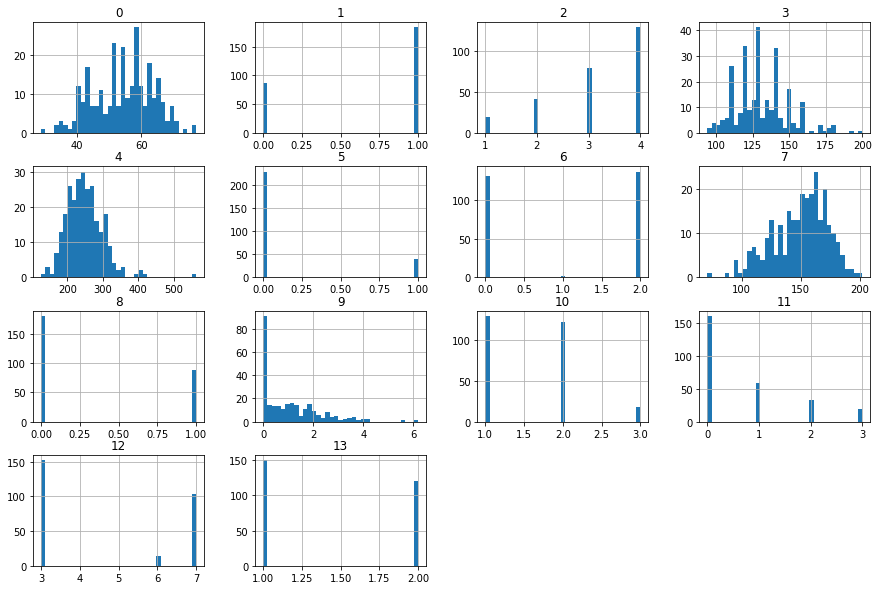

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

dataset.hist(bins=35, figsize=(15, 10))
plt.show()

In [9]:
corr_matrix = dataset.corr()
corr_matrix[13].sort_values(ascending=False)

13    1.000000
12    0.525020
11    0.455336
8     0.419303
9     0.417967
2     0.417436
10    0.337616
1     0.297721
0     0.212322
6     0.182091
3     0.155383
4     0.118021
5    -0.016319
7    -0.418514
Name: 13, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40d5a8fa90>,
      dtype=object)

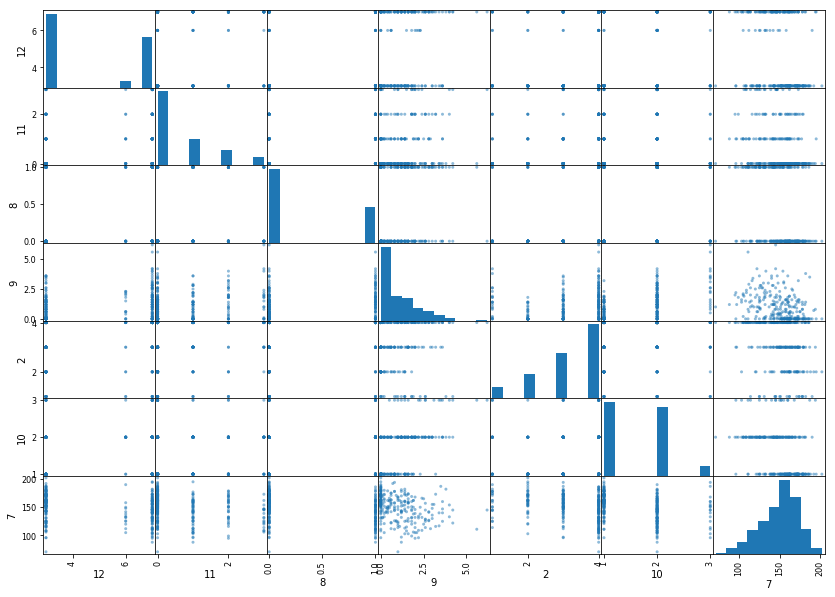

In [10]:
from pandas.tools.plotting import scatter_matrix

attributes = [12, 11, 8, 9, 2, 10, 7]
scatter_matrix(dataset[attributes], figsize=(14, 10))

In [11]:
X = dataset.iloc[:, attributes].values
y = dataset.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

gauss_clf = GaussianNB()
svc_clf = SVC(kernel="linear")
log_clf = LogisticRegression()

In [14]:
voting_clf = VotingClassifier(
    estimators=[("gsc", gauss_clf), ("svc", svc_clf), ("lgc", log_clf)],
    voting="hard"
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('gsc', GaussianNB(priors=None)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('lgc', Logistic...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [24]:
from sklearn.metrics import accuracy_score

for clf in (gauss_clf, svc_clf, log_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, "{0:.3f}".format(accuracy_score(y_test, y_pred)))

GaussianNB 0.870
SVC 0.907
LogisticRegression 0.926
VotingClassifier 0.926


In [25]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(voting_clf, X_train, y_train, cv=10)

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[102,  15],
       [ 21,  78]])

In [27]:
from sklearn.metrics import f1_score

print("F1 score: {0:.3f}".format(f1_score(y_train, y_train_pred)))

F1 score: 0.850
